# Limpieza de una base de datos de excel
Autor: Gerardo Arias

GitHub: gerardoarias


A continuación realizo la limpieza de una base de datos sencilla extraida de las series almacenadas en el repositorio público del Banco de la República. Este ejemplo indica una serie de pasos sencillos de seguir para que quien desee  los realice con sus propias bases de datos.

La base de datos de este ejemplo proviene del siguiente enlace: https://www.banrep.gov.co/es/estadisticas/agregados-monetarios  (Efectivo, Base monetaria, M3 y sus componentes - Mensual)

## Contenido
#### 1. Cargue de la base de datos
#### 2. Cambio en el nombre de las variables
#### 3. Convertir variables y cambiar títulos de variables con nombre numérico (eg. 2015)
#### 4. Operaciones básicas seleccionando observaciones
#### 5. Definit Índice
#### 6. Eliminar observaciones que registran todos sus valores como missing values
#### 7. 

#### Cargue de la base de datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
AMC =  pd.read_excel("/content/2.1. Depositos en el Sistema Financiero PSE.xlsx", 
                     sheet_name="Sheet1",   # Seleccionamos la hoja de cálculo
                     skiprows=9,            # Eliminamos el encabezado  (Ello puede variar dependiendo del tamaño del encabezado)
                     skipfooter=82,         # Eliminamos los pie de página   (Ello puede variar dependiendo del tamaño del footer o pie de página)
                     usecols="A:Y"          # Definimos las columnas que deseamos tomar
                     )


In [3]:
AMC.head()

,Año(aaaa)-Mes(mm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Del sector privado,Del sector público,Total,Cuentas de ahorro,CDT 1/,TOTAL1/,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Repos con la DGCPTN,Repos con entidades no financieras,Total.1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,2021-08-31,95756.142721,33022.917597,128779.060318,60699.065760,14618.521597,75317.587358,266382.740596,155147.356291,421530.096887,6708.107220,9813.995061,0.0,34264.133575,0.0,0.0,0.0,547633.920101,171073.730079,592603.826966,643390.062821,0.0,1512.9819,161.023,549307.925001
1,2021-07-31,96460.399529,32194.533843,128654.933372,58756.150398,12332.480652,71088.631049,269779.754535,154847.922694,424627.677229,7191.062276,8552.137797,0.0,34342.855651,0.0,0.0,0.0,545802.364001,167549.030578,592176.707807,642262.763529,0.0,1850.2619,161.023,547813.648901
2,2021-06-30,96861.118864,32516.321661,129377.440525,57721.448821,12817.301031,70538.749852,263747.857062,155424.594351,419172.451412,7057.900619,8808.396718,0.0,34164.995558,0.0,0.0,0.0,539742.494159,167399.868715,586572.320128,636603.613023,0.0,2577.2089,185.923,542505.626059
3,2021-05-31,93239.970008,31415.349596,124655.319604,58325.764798,14155.576935,72481.341732,256045.714505,153626.033375,409671.747881,6798.858041,10500.883014,0.0,33452.570534,0.0,0.0,0.0,532905.401203,165721.311740,575393.059621,626145.371211,0.0,2788.5829,185.923,535879.907103
4,2021-04-30,91311.380331,33027.955241,124339.335572,56149.668204,12382.441403,68532.109608,258528.935703,155233.285593,413762.221296,7243.844070,9145.157880,0.0,33724.209679,0.0,0.0,0.0,532407.542533,159843.489939,573605.711235,623718.922864,0.0,2931.8029,214.103,535553.448433


In [4]:
AMC.tail()

,Año(aaaa)-Mes(mm),Unnamed: 1,Unnamed: 2,Unnamed: 3,Del sector privado,Del sector público,Total,Cuentas de ahorro,CDT 1/,TOTAL1/,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Repos con la DGCPTN,Repos con entidades no financieras,Total.1,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
447,1984-05-31,112.006,139.043,251.049,232.985,24.129,257.114,320.890,352.095,672.985,4.100,22.236,15.488,20.917,0.0,0.0,0.0,992.840,369.120,1042.105,1104.846,0.0,NaN,NaN,992.840
448,1984-04-30,108.388,151.184,259.572,239.012,24.411,263.423,319.670,352.150,671.820,5.498,16.682,13.349,20.561,0.0,0.0,0.0,991.333,371.811,1043.631,1099.721,0.0,NaN,NaN,991.333
449,1984-03-31,106.416,146.641,253.057,234.164,24.366,258.530,318.927,351.476,670.403,5.606,15.868,11.386,20.316,0.0,0.0,0.0,982.109,364.946,1035.349,1088.525,0.0,NaN,NaN,982.109
450,1984-02-29,103.102,155.022,258.124,234.832,25.337,260.169,316.077,347.256,663.333,5.969,14.261,9.466,20.341,0.0,0.0,0.0,973.539,363.271,1026.604,1076.641,0.0,NaN,NaN,973.539
451,1984-01-31,108.810,160.524,269.334,236.622,25.451,262.073,312.303,336.034,648.337,4.047,15.562,8.616,20.624,0.0,0.0,0.0,959.259,370.883,1019.220,1068.069,0.0,NaN,NaN,959.259


#### Cambio del nombre de las variables

In [5]:
AMC.info()     
# Con ello revisamos el tamaño de la BD, las variables almancenadas en ella, así como sus nombre, sus valores no nulos y el tipo de dato almacenado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Año(aaaa)-Mes(mm)                   452 non-null    datetime64[ns]
 1   Unnamed: 1                          452 non-null    float64       
 2   Unnamed: 2                          452 non-null    float64       
 3   Unnamed: 3                          452 non-null    float64       
 4   Del sector privado                  452 non-null    float64       
 5   Del sector público                  452 non-null    float64       
 6   Total                               452 non-null    float64       
 7   Cuentas de ahorro                   452 non-null    float64       
 8   CDT 1/                              452 non-null    float64       
 9   TOTAL1/                             452 non-null    float64       
 10  Unnamed: 10               

In [6]:
cols = list(AMC.columns)  # Creamos una lista con los nombres para que sea sistemático el cambio de nombres

In [7]:
cols = [x.lower().strip() for x in cols]    
# Con este loop convertimos los nombres a letras minúsculas y eliminamos los espacios en blanco antes y después de la variable

In [8]:
AMC.columns = cols # Asignamos como columnas, las ya antes modificadas

In [9]:
AMC.head()

,año(aaaa)-mes(mm),unnamed: 1,unnamed: 2,unnamed: 3,del sector privado,del sector público,total,cuentas de ahorro,cdt 1/,total1/,unnamed: 10,unnamed: 11,unnamed: 12,unnamed: 13,repos con la dgcptn,repos con entidades no financieras,total.1,unnamed: 17,unnamed: 18,unnamed: 19,unnamed: 20,unnamed: 21,unnamed: 22,unnamed: 23,unnamed: 24
0,2021-08-31,95756.142721,33022.917597,128779.060318,60699.065760,14618.521597,75317.587358,266382.740596,155147.356291,421530.096887,6708.107220,9813.995061,0.0,34264.133575,0.0,0.0,0.0,547633.920101,171073.730079,592603.826966,643390.062821,0.0,1512.9819,161.023,549307.925001
1,2021-07-31,96460.399529,32194.533843,128654.933372,58756.150398,12332.480652,71088.631049,269779.754535,154847.922694,424627.677229,7191.062276,8552.137797,0.0,34342.855651,0.0,0.0,0.0,545802.364001,167549.030578,592176.707807,642262.763529,0.0,1850.2619,161.023,547813.648901
2,2021-06-30,96861.118864,32516.321661,129377.440525,57721.448821,12817.301031,70538.749852,263747.857062,155424.594351,419172.451412,7057.900619,8808.396718,0.0,34164.995558,0.0,0.0,0.0,539742.494159,167399.868715,586572.320128,636603.613023,0.0,2577.2089,185.923,542505.626059
3,2021-05-31,93239.970008,31415.349596,124655.319604,58325.764798,14155.576935,72481.341732,256045.714505,153626.033375,409671.747881,6798.858041,10500.883014,0.0,33452.570534,0.0,0.0,0.0,532905.401203,165721.311740,575393.059621,626145.371211,0.0,2788.5829,185.923,535879.907103
4,2021-04-30,91311.380331,33027.955241,124339.335572,56149.668204,12382.441403,68532.109608,258528.935703,155233.285593,413762.221296,7243.844070,9145.157880,0.0,33724.209679,0.0,0.0,0.0,532407.542533,159843.489939,573605.711235,623718.922864,0.0,2931.8029,214.103,535553.448433


In [10]:
cols

['año(aaaa)-mes(mm)',
 'unnamed: 1',
 'unnamed: 2',
 'unnamed: 3',
 'del sector privado',
 'del sector público',
 'total',
 'cuentas de ahorro',
 'cdt 1/',
 'total1/',
 'unnamed: 10',
 'unnamed: 11',
 'unnamed: 12',
 'unnamed: 13',
 'repos con la dgcptn',
 'repos con entidades no financieras',
 'total.1',
 'unnamed: 17',
 'unnamed: 18',
 'unnamed: 19',
 'unnamed: 20',
 'unnamed: 21',
 'unnamed: 22',
 'unnamed: 23',
 'unnamed: 24']

Ahora procedemos a cambiarles de nombre por uno sencillo de entender. Este paso depende enteramente del archivo escogido. En este caso el encabezado del archivo de excel contenía mayor información sobre las variables y hacía de arbol de variables. Es por ello que poner dentro del nombre de cada variable algún etiquetado sobre estas ramas resulta muy informativo.

Un ejemplo es el de 'Depósitos en poder del público', el cual se subdivide en varios ítems. Entonces si queremos analizar la rama de 'Cuentas corrientes' y dentro de ella 'Del Sector Privado', podemos renombrarla así: 'DP_CuentaCorriente_SectorPrivado'

In [11]:
AMC.rename(columns={'año(aaaa)-mes(mm)': 'ano_mes',
 'unnamed: 1': 'baseMonetaria_Efectivo',
 'unnamed: 2': 'baseMonetaria_ReservaBancaria',
 'unnamed: 3': 'baseMonetaria_Total',
 'del sector privado': 'DP_CuentaCorriente_SectorPrivado',
 'del sector público':  'DP_CuentaCorriente_SectorPublico',
 'total':  'DP_CuentaCorriente_Total',
 'cuentas de ahorro': 'DP_Cuasidineros_CuentaDeAhorro',
 'cdt 1/': 'DP_Cuasidineros_CDT',
 'total1/': 'DP_Cuasidineros_TOTAL',
 'unnamed: 10': 'DP_otrosDepositosALaVista',
 'unnamed: 11': 'DP_depositosFiduciarios',
 'unnamed: 12': 'DP_cedulas',
 'unnamed: 13': 'DP_bonos',
 'repos con la dgcptn': 'DP_RST_ReposDGCPTN',
 'repos con entidades no financieras': 'DP_RST_ReposEntidadesNoFinancieras',
 'total.1': 'DP_RST_Total',
 'unnamed: 17': 'DP_TotalDepositosEnPoderDelPublico',
 'unnamed: 18': 'M1',
 'unnamed: 19': 'M2',
 'unnamed: 20': 'M3',
 'unnamed: 21': 'depositosRestringidos',
 'unnamed: 22': 'CDTBanRep',
 'unnamed: 23': 'BonosBanRep',
 'unnamed: 24': 'totalDepositos'},
 inplace=True)

In [12]:
AMC.head()

,ano_mes,baseMonetaria_Efectivo,baseMonetaria_ReservaBancaria,baseMonetaria_Total,DP_CuentaCorriente_SectorPrivado,DP_CuentaCorriente_SectorPublico,DP_CuentaCorriente_Total,DP_Cuasidineros_CuentaDeAhorro,DP_Cuasidineros_CDT,DP_Cuasidineros_TOTAL,DP_otrosDepositosALaVista,DP_depositosFiduciarios,DP_cedulas,DP_bonos,DP_RST_ReposDGCPTN,DP_RST_ReposEntidadesNoFinancieras,DP_RST_Total,DP_TotalDepositosEnPoderDelPublico,M1,M2,M3,depositosRestringidos,CDTBanRep,BonosBanRep,totalDepositos
0,2021-08-31,95756.142721,33022.917597,128779.060318,60699.065760,14618.521597,75317.587358,266382.740596,155147.356291,421530.096887,6708.107220,9813.995061,0.0,34264.133575,0.0,0.0,0.0,547633.920101,171073.730079,592603.826966,643390.062821,0.0,1512.9819,161.023,549307.925001
1,2021-07-31,96460.399529,32194.533843,128654.933372,58756.150398,12332.480652,71088.631049,269779.754535,154847.922694,424627.677229,7191.062276,8552.137797,0.0,34342.855651,0.0,0.0,0.0,545802.364001,167549.030578,592176.707807,642262.763529,0.0,1850.2619,161.023,547813.648901
2,2021-06-30,96861.118864,32516.321661,129377.440525,57721.448821,12817.301031,70538.749852,263747.857062,155424.594351,419172.451412,7057.900619,8808.396718,0.0,34164.995558,0.0,0.0,0.0,539742.494159,167399.868715,586572.320128,636603.613023,0.0,2577.2089,185.923,542505.626059
3,2021-05-31,93239.970008,31415.349596,124655.319604,58325.764798,14155.576935,72481.341732,256045.714505,153626.033375,409671.747881,6798.858041,10500.883014,0.0,33452.570534,0.0,0.0,0.0,532905.401203,165721.311740,575393.059621,626145.371211,0.0,2788.5829,185.923,535879.907103
4,2021-04-30,91311.380331,33027.955241,124339.335572,56149.668204,12382.441403,68532.109608,258528.935703,155233.285593,413762.221296,7243.844070,9145.157880,0.0,33724.209679,0.0,0.0,0.0,532407.542533,159843.489939,573605.711235,623718.922864,0.0,2931.8029,214.103,535553.448433


#### Convertir variables y cambiar títulos de variables con nombre numérico (eg. 2015)

In [ ]:
for col in AMC.columns[1:]:
  AMC[col] = pd.to_numeric(AMC[col], errors='coerce')   # -> Convertir las variables de tipo 'object' a numéricas
  # AMC.rename(columns={col:'pcGDP'+col}, inplace=True) # -> útil para cuando las columnas tienen títulos numéricos y se hace necesario cambiarles de nombre. Este código les agrega un encabezado pcGDP y concatena con el título numérico  

In [ ]:
AMC.dtypes

ano_mes                               datetime64[ns]
baseMonetaria_Efectivo                       float64
baseMonetaria_ReservaBancaria                float64
baseMonetaria_Total                          float64
DP_CuentaCorriente_SectorPrivado             float64
DP_CuentaCorriente_SectorPublico             float64
DP_CuentaCorriente_Total                     float64
DP_Cuasidineros_CuentaDeAhorro               float64
DP_Cuasidineros_CDT                          float64
DP_Cuasidineros_TOTAL                        float64
DP_otrosDepositosALaVista                    float64
DP_depositosFiduciarios                      float64
DP_cedulas                                   float64
DP_bonos                                     float64
DP_RST_ReposDGCPTN                           float64
DP_RST_ReposEntidadesNoFinancieras           float64
DP_RST_Total                                 float64
DP_TotalDepositosEnPoderDelPublico           float64
M1                                           f

#### Operaciones básicas seleccionando observaciones

In [ ]:
# Hagamos operaciones básicas con los datos
# Aquí sumamos la base monetaria en efectivo y en reserva bancaria para agosto de 2021
AMC.iloc[0,1], AMC.iloc[0,2], AMC.iloc[0,1] + AMC.iloc[0,2]

(95756.14272066, 33022.91759734, 128779.060318)

#### Definir Índice

In [ ]:
AMC.index = AMC.ano_mes

In [ ]:
AMC.head()

,ano_mes,baseMonetaria_Efectivo,baseMonetaria_ReservaBancaria,baseMonetaria_Total,DP_CuentaCorriente_SectorPrivado,DP_CuentaCorriente_SectorPublico,DP_CuentaCorriente_Total,DP_Cuasidineros_CuentaDeAhorro,DP_Cuasidineros_CDT,DP_Cuasidineros_TOTAL,DP_otrosDepositosALaVista,DP_depositosFiduciarios,DP_cedulas,DP_bonos,DP_RST_ReposDGCPTN,DP_RST_ReposEntidadesNoFinancieras,DP_RST_Total,DP_TotalDepositosEnPoderDelPublico,M1,M2,M3,depositosRestringidos,CDTBanRep,BonosBanRep,totalDepositos
ano_mes,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-31,2021-08-31,95756.142721,33022.917597,128779.060318,60699.065760,14618.521597,75317.587358,266382.740596,155147.356291,421530.096887,6708.107220,9813.995061,0.0,34264.133575,0.0,0.0,0.0,547633.920101,171073.730079,592603.826966,643390.062821,0.0,1512.9819,161.023,549307.925001
2021-07-31,2021-07-31,96460.399529,32194.533843,128654.933372,58756.150398,12332.480652,71088.631049,269779.754535,154847.922694,424627.677229,7191.062276,8552.137797,0.0,34342.855651,0.0,0.0,0.0,545802.364001,167549.030578,592176.707807,642262.763529,0.0,1850.2619,161.023,547813.648901
2021-06-30,2021-06-30,96861.118864,32516.321661,129377.440525,57721.448821,12817.301031,70538.749852,263747.857062,155424.594351,419172.451412,7057.900619,8808.396718,0.0,34164.995558,0.0,0.0,0.0,539742.494159,167399.868715,586572.320128,636603.613023,0.0,2577.2089,185.923,542505.626059
2021-05-31,2021-05-31,93239.970008,31415.349596,124655.319604,58325.764798,14155.576935,72481.341732,256045.714505,153626.033375,409671.747881,6798.858041,10500.883014,0.0,33452.570534,0.0,0.0,0.0,532905.401203,165721.311740,575393.059621,626145.371211,0.0,2788.5829,185.923,535879.907103
2021-04-30,2021-04-30,91311.380331,33027.955241,124339.335572,56149.668204,12382.441403,68532.109608,258528.935703,155233.285593,413762.221296,7243.844070,9145.157880,0.0,33724.209679,0.0,0.0,0.0,532407.542533,159843.489939,573605.711235,623718.922864,0.0,2931.8029,214.103,535553.448433


In [ ]:
AMC.drop('ano_mes',axis=1, inplace=True)

Otra forma mucho más limpia de definir el index es esta:

In [ ]:
AMC.ano_mes.count()  # Cuenta las observaciones para esta columnas

In [ ]:
AMC.ano_mes.nunique()   # Cuentas las observaciones únicas para esta columna

In [ ]:
AMC.set_index('ano_mes', inplace=True)  # Establece como indice la columna ano_mes

In [ ]:
AMC.shape

(452, 24)

In [ ]:
AMC.head()

,baseMonetaria_Efectivo,baseMonetaria_ReservaBancaria,baseMonetaria_Total,DP_CuentaCorriente_SectorPrivado,DP_CuentaCorriente_SectorPublico,DP_CuentaCorriente_Total,DP_Cuasidineros_CuentaDeAhorro,DP_Cuasidineros_CDT,DP_Cuasidineros_TOTAL,DP_otrosDepositosALaVista,DP_depositosFiduciarios,DP_cedulas,DP_bonos,DP_RST_ReposDGCPTN,DP_RST_ReposEntidadesNoFinancieras,DP_RST_Total,DP_TotalDepositosEnPoderDelPublico,M1,M2,M3,depositosRestringidos,CDTBanRep,BonosBanRep,totalDepositos
ano_mes,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-31,95756.142721,33022.917597,128779.060318,60699.065760,14618.521597,75317.587358,266382.740596,155147.356291,421530.096887,6708.107220,9813.995061,0.0,34264.133575,0.0,0.0,0.0,547633.920101,171073.730079,592603.826966,643390.062821,0.0,1512.9819,161.023,549307.925001
2021-07-31,96460.399529,32194.533843,128654.933372,58756.150398,12332.480652,71088.631049,269779.754535,154847.922694,424627.677229,7191.062276,8552.137797,0.0,34342.855651,0.0,0.0,0.0,545802.364001,167549.030578,592176.707807,642262.763529,0.0,1850.2619,161.023,547813.648901
2021-06-30,96861.118864,32516.321661,129377.440525,57721.448821,12817.301031,70538.749852,263747.857062,155424.594351,419172.451412,7057.900619,8808.396718,0.0,34164.995558,0.0,0.0,0.0,539742.494159,167399.868715,586572.320128,636603.613023,0.0,2577.2089,185.923,542505.626059
2021-05-31,93239.970008,31415.349596,124655.319604,58325.764798,14155.576935,72481.341732,256045.714505,153626.033375,409671.747881,6798.858041,10500.883014,0.0,33452.570534,0.0,0.0,0.0,532905.401203,165721.311740,575393.059621,626145.371211,0.0,2788.5829,185.923,535879.907103
2021-04-30,91311.380331,33027.955241,124339.335572,56149.668204,12382.441403,68532.109608,258528.935703,155233.285593,413762.221296,7243.844070,9145.157880,0.0,33724.209679,0.0,0.0,0.0,532407.542533,159843.489939,573605.711235,623718.922864,0.0,2931.8029,214.103,535553.448433


In [ ]:
AMC.index

DatetimeIndex(['2021-08-31', '2021-07-31', '2021-06-30', '2021-05-31',
               '2021-04-30', '2021-03-31', '2021-02-28', '2021-01-31',
               '2020-12-31', '2020-11-30',
               ...
               '1984-10-31', '1984-09-30', '1984-08-31', '1984-07-31',
               '1984-06-30', '1984-05-31', '1984-04-30', '1984-03-31',
               '1984-02-29', '1984-01-31'],
              dtype='datetime64[ns]', name='ano_mes', length=452, freq=None)

#### Eliminar observaciones que registran todos sus valores como missing values

In [ ]:
AMC.dropna(subset=AMC.columns[1:], how="all", inplace=True)  
# Elimina las observaciones en donde todas las columnas (indicadas en el parámetro subset) registren missing values. 

In [ ]:
AMC.shape
# En este caso no hubo ese tipo de observaciones

(452, 24)

#### Revisión descriptiva

In [ ]:
AMC.describe()

,baseMonetaria_Efectivo,baseMonetaria_ReservaBancaria,baseMonetaria_Total,DP_CuentaCorriente_SectorPrivado,DP_CuentaCorriente_SectorPublico,DP_CuentaCorriente_Total,DP_Cuasidineros_CuentaDeAhorro,DP_Cuasidineros_CDT,DP_Cuasidineros_TOTAL,DP_otrosDepositosALaVista,DP_depositosFiduciarios,DP_cedulas,DP_bonos,DP_RST_ReposDGCPTN,DP_RST_ReposEntidadesNoFinancieras,DP_RST_Total,DP_TotalDepositosEnPoderDelPublico,M1,M2,M3,depositosRestringidos,CDTBanRep,BonosBanRep,totalDepositos
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,18.000000,18.000000,452.000000
mean,18865.037667,9982.495810,28847.533477,13142.694551,5151.219635,18293.914186,58441.195191,49750.239812,108191.435003,1993.439074,2998.986715,161.592126,8850.359899,310.268706,82.265388,392.534094,140882.261097,37158.951853,145350.386856,159791.860470,44.561706,4812.268794,237.042500,141087.102422
std,22976.426766,10975.613113,33638.983013,14561.217491,4775.891489,19085.905933,69161.617594,55822.642432,124192.629477,2004.105904,2901.665437,278.968895,10356.092281,714.205411,154.026149,770.365242,157701.270678,41840.299526,165718.249565,180353.535149,118.688588,2059.508502,55.966339,158196.746997
min,103.102000,124.158000,244.998000,232.985000,24.129000,257.114000,312.303000,336.034000,648.337000,2.248000,14.261000,0.000000,11.755000,0.000000,0.000000,0.000000,959.259000,363.271000,1019.220000,1068.069000,0.000000,1512.981900,161.023000,959.259000
25%,1205.074500,2208.229353,3427.912250,1685.918500,1061.327500,2761.059000,5162.713000,3553.691500,8708.269500,284.426804,469.190578,0.000000,326.697500,0.000000,0.000000,0.000000,12592.483274,3989.446000,12675.433000,13798.587774,0.000000,3086.177900,192.968000,12592.483274
50%,8468.430094,3769.289025,11926.713006,6140.647003,3419.428901,9453.041447,22941.121402,24333.316347,45239.883622,1251.213287,1730.502742,27.781500,4224.919797,0.000000,0.000000,18.468000,61864.780140,18101.399040,63434.766570,70557.016137,0.000000,4672.717450,221.603000,61864.780140
75%,29040.974088,17003.316834,46096.573552,22624.506565,9426.000909,32476.137292,96917.328014,75532.818004,175010.644410,3359.491722,5387.635354,245.050500,18398.752767,76.392500,92.060803,360.947563,233163.102574,61538.477234,235642.116869,261856.270761,0.000000,6563.844400,279.703000,233163.011088
max,96861.118864,40365.757821,132673.592306,60699.065760,15625.703579,75317.587358,269779.754535,178952.079989,424627.677229,9150.426135,10825.159310,1170.708000,34342.855651,3566.508000,849.749082,3667.017698,547633.920101,171073.730079,592603.826966,643390.062821,648.882919,8156.545900,341.403000,549307.925001


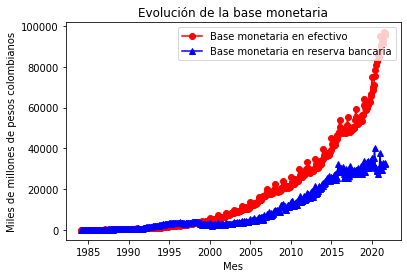

In [ ]:
plt.plot(AMC.index,AMC.baseMonetaria_Efectivo,color = 'red', label = 'Base monetaria en efectivo', marker = 'o')
plt.plot(AMC.index,AMC.baseMonetaria_ReservaBancaria,color = 'blue', label = 'Base monetaria en reserva bancaria', marker = '^')
plt.xlabel('Mes')
plt.ylabel('Miles de millones de pesos colombianos')
plt.title('Evolución de la base monetaria')
plt.legend(loc='upper right')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


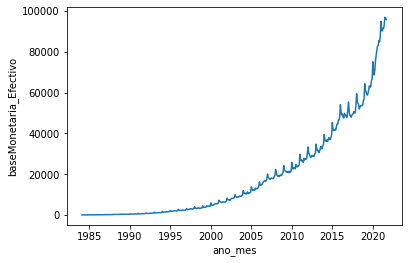

In [ ]:
sns.lineplot(AMC.index,AMC['baseMonetaria_Efectivo'])

In [ ]:
AMC.baseMonetaria_Total

ano_mes
2021-08-31    128779.060318
2021-07-31    128654.933372
2021-06-30    129377.440525
2021-05-31    124655.319604
2021-04-30    124339.335572
                  ...      
1984-05-31       251.049000
1984-04-30       259.572000
1984-03-31       253.057000
1984-02-29       258.124000
1984-01-31       269.334000
Name: baseMonetaria_Total, Length: 452, dtype: float64